# Exploratory Data Analysis & Intro

### Goal
1. Examine historical and current rental listings  
2. Use python to calculate key metrics 
3. Determine if the property is investable

### Final Deliverables
* Jupyter Notebooks
* Summary Page
* Project deployment via Github

### Questions to Answer
1. What is the Net Operating Income for 1011 Southport Ave, Lisle, IL?
2. What is the Debt Service Coverage Ratio for this property?
3. Is this real estate investment financially viable?
4. How many years will it take to recover initial loss?

## Exploratory Data Analysis for Rental listings near Lisle, IL
### Nearby 4+ Beds Rentals to Explore

In [3]:
# Define a list of rental URLs for different cities
rental_urls = [
    'https://www.zillow.com/bolingbrook-il/rentals/',
    'https://www.zillow.com/downers-grove-il/rentals/',
    'https://www.zillow.com/lisle-il/rentals/',
    'https://www.zillow.com/naperville-il/rentals/',
    'https://www.zillow.com/wheaton-il/rentals/'
]

# Set headers to mimic a real browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
}

# Initialize a list to store all rental listings data
all_rental_listings_data = []

# Loop through each URL and perform scraping
for rental_url in rental_urls:
    # Make the request to the URL
    response = requests.get(rental_url, headers=headers)
    response.raise_for_status()  # Ensure we notice bad responses

    # Parse the HTML content with BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Initialize a list to store URLs and data for this city
    rental_listings_data = []

    # Find the container that holds the rental listings
    rental_listings_container = soup.find('ul', class_='List-c11n-8-102-0__sc-1smrmqp-0 StyledSearchListWrapper-srp-8-102-0__sc-1ieen0c-0 kquqgw gLCZxh photo-cards')

    if rental_listings_container:
        rental_listings = rental_listings_container.find_all('li', class_='ListItem-c11n-8-102-0__sc-13rwu5a-0 StyledListCardWrapper-srp-8-102-0__sc-wtsrtn-0 hKdzLV kgwlbT', limit=20)  # Limit to 20 listings
        for rental_listing in rental_listings:
            # Extract the URL of the rental listing
            rental_listing_link = rental_listing.find('a', href=True)
            if rental_listing_link:
                href = rental_listing_link['href']
                if not href.startswith('http'):
                    full_url = 'https://www.zillow.com' + href
                else:
                    full_url = href

            # Extract additional data from the rental listing
            rental_listing_data = {
                'url': full_url
            }

            # Extract the address
            address = rental_listing.find('address')
            rental_listing_data['address'] = address.text if address else 'N/A'

            # Extract the price
            price = rental_listing.find('span', class_='PropertyCardWrapper__StyledPriceLine-srp-8-102-0__sc-16e8gqd-1')
            rental_listing_data['price'] = price.text if price else 'N/A'

            # Extract the bed, bath, sqft
            sqft_info = rental_listing.find('ul', class_='StyledPropertyCardHomeDetailsList-c11n-8-102-0__sc-1j0som5-0 exCsDV')
            if sqft_info:
                sqft_info_text = sqft_info.text.replace('\xa0', ' ')  # Clean up non-breaking spaces
                sqft_info_text = re.sub(r'(\d+ bds?)(\d+ ba)', r'\1, \2,', sqft_info_text)
                rental_listing_data['sqft_info'] = sqft_info_text
            else:
                rental_listing_data['sqft_info'] = 'N/A'

            # Extract the days on market
            days_on_market = rental_listing.find('div', class_='StyledPropertyCardBadgeArea-c11n-8-102-0__sc-11omngf-0 gQsSDB')
            rental_listing_data['days_on_market'] = days_on_market.text if days_on_market else 'N/A'

            rental_listings_data.append(rental_listing_data)

    # Append the data for this city to the overall list
    all_rental_listings_data.extend(rental_listings_data)

# Output the results
for i, data in enumerate(all_rental_listings_data):
    print(f"Rental Listing {i+1}:")
    print(f"Address: {data['address']}")
    print(f"Price: {data['price']}")
    print(f"Details: {data['sqft_info']}")
    print(f"Days on Market: {data['days_on_market']}")
    print(f"URL: {data['url']}")
    print()

Rental Listing 1:
Address: 558 Alcott Ln, Bolingbrook, IL 60440
Price: $2,995/mo
Details: 4 bds, 3 ba,2,107 sqft
Days on Market: 8 days ago
URL: https://www.zillow.com/homedetails/558-Alcott-Ln-Bolingbrook-IL-60440/5407231_zpid/

Rental Listing 2:
Address: 1020 Kent Ct, Bolingbrook, IL 60440
Price: $3,390/mo
Details: 5 bds, 3 ba,1,606 sqft
Days on Market: 4 days ago
URL: https://www.zillow.com/homedetails/1020-Kent-Ct-Bolingbrook-IL-60440/4556991_zpid/

Rental Listing 3:
Address: N/A
Price: N/A
Details: N/A
Days on Market: N/A
URL: https://www.zillow.com/homedetails/1020-Kent-Ct-Bolingbrook-IL-60440/4556991_zpid/

Rental Listing 4:
Address: 220 Braemar Gln, Bolingbrook, IL 60440
Price: $3,000/mo
Details: 4 bds, 3 ba,1,740 sqft
Days on Market: 29 days agoApply instantly
URL: https://www.zillow.com/homedetails/220-Braemar-Gln-Bolingbrook-IL-60440/5403775_zpid/

Rental Listing 5:
Address: 434 Monarch Ln, Bolingbrook, IL 60440
Price: $3,045/mo
Details: 4 bds, 3 ba,2,058 sqft
Days on Market

### Turn extracted data into a dataframe

In [4]:
rentals_df = pd.DataFrame(all_rental_listings_data)
rentals_df = rentals_df.drop(columns=['days_on_market','url'])
rentals_df = rentals_df[rentals_df['address'] != 'N/A']
rentals_df

,address,price,sqft_info
0,"558 Alcott Ln, Bolingbrook, IL 60440","$2,995/mo","4 bds, 3 ba,2,107 sqft"
1,"1020 Kent Ct, Bolingbrook, IL 60440","$3,390/mo","5 bds, 3 ba,1,606 sqft"
3,"220 Braemar Gln, Bolingbrook, IL 60440","$3,000/mo","4 bds, 3 ba,1,740 sqft"
4,"434 Monarch Ln, Bolingbrook, IL 60440","$3,045/mo","4 bds, 3 ba,2,058 sqft"
5,"220 Mill Stream Dr, Bolingbrook, IL 60440","$2,710/mo","5 bds, 2 ba,1,800 sqft"
6,"11 Pennsbury Ct, Bolingbrook, IL 60440","$4,300/mo","4 bds, 3 ba,2,723 sqft"
7,"261 Galewood Dr, Bolingbrook, IL 60440","$3,000/mo","5 bds, 2 ba,1,825 sqft"
8,"769 Hartford Ln, Bolingbrook, IL 60440","$4,200/mo","5 bds, 4 ba,3,888 sqft"
9,"104 S Schmidt Rd, Bolingbrook, IL 60440","$3,200/mo","4 bds, 3 ba,1,600 sqft"
16,"6003 Puffer Rd, Downers Grove, IL 60516","$3,095/mo","4 bds, 2 ba,2,130 sqft"


### Clean up price to convert to float type

In [5]:
rentals_df['address'] = rentals_df['address'].astype(str)
rentals_df['price'] = rentals_df['price'].replace({'\$': '', ',': '', '/mo': ''}, regex=True).astype(float)
rentals_df.dtypes

address       object
price        float64
sqft_info     object
dtype: object

### Add a city column by filtering the dataframe

In [7]:
# Define the specific cities
specific_cities = ['Downers Grove', 'Wheaton', 'Naperville', 'Lisle', 'Bolingbrook']

# Create regex pattern to match cities
rental_pattern = '|'.join(specific_cities)

# Filter the DataFrame to include only rows where 'address' contains any city from the pattern
rental_df_filtered = rentals_df[rentals_df['address'].str.contains(rental_pattern, na=False)]

# Extract city names and create a new column 'city'
rental_df_filtered['city'] = rental_df_filtered['address'].str.extract('(' + rental_pattern + ')')

# Further filter to include only rows where 'sqft_info' contains '4 bds'
rental_df_filtered = rental_df_filtered[rental_df_filtered['sqft_info'].str.contains('4 bds', na=False)]

# Display the filtered DataFrame
rental_df_filtered


C:\Users\kevin\AppData\Local\Temp\ipykernel_13852\1318697336.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rental_df_filtered['city'] = rental_df_filtered['address'].str.extract('(' + rental_pattern + ')')


,address,price,sqft_info,city
0,"558 Alcott Ln, Bolingbrook, IL 60440",2995.0,"4 bds, 3 ba,2,107 sqft",Bolingbrook
3,"220 Braemar Gln, Bolingbrook, IL 60440",3000.0,"4 bds, 3 ba,1,740 sqft",Bolingbrook
4,"434 Monarch Ln, Bolingbrook, IL 60440",3045.0,"4 bds, 3 ba,2,058 sqft",Bolingbrook
6,"11 Pennsbury Ct, Bolingbrook, IL 60440",4300.0,"4 bds, 3 ba,2,723 sqft",Bolingbrook
9,"104 S Schmidt Rd, Bolingbrook, IL 60440",3200.0,"4 bds, 3 ba,1,600 sqft",Bolingbrook
16,"6003 Puffer Rd, Downers Grove, IL 60516",3095.0,"4 bds, 2 ba,2,130 sqft",Downers Grove
19,"1042 Norfolk St, Downers Grove, IL 60516",2950.0,"4 bds, 2 ba,1,430 sqft",Downers Grove
20,"51 Tower Rd, Downers Grove, IL 60515",3540.0,"4 bds, 3 ba,2,648 sqft",Downers Grove
21,"5114 Main St UNIT B, Downers Grove, IL 60515",3500.0,"4 bds, 2 ba,2,300 sqft",Downers Grove
24,"619 E 8th Ave, Naperville, IL 60563",3150.0,"4 bds, 2 ba,-- sqft",Naperville


### Find median rental price per month by city

In [8]:
#group by city
grouped_rental_df = rental_df_filtered.groupby('city')['price'].median()
print(grouped_rental_df)

city
Bolingbrook      3045.0
Downers Grove    3095.0
Naperville       3500.0
Wheaton          7500.0
Name: price, dtype: float64


### Get Historical rental prices for Lisle, IL using API

In [9]:
import requests
import pandas as pd

# Fetch data
url = "https://api.rentcast.io/v1/markets"
headers = {
    "accept": "application/json",
    "X-Api-Key": "api-key"
}
response = requests.get(url, headers=headers)
data = response.json()

# Initialize lists to store DataFrames
historical_dfs = []

# Check if 'rentalData' key exists in the response
if 'rentalData' in data:
    rental_data = data['rentalData']

    # Process historical data
    historical_data = rental_data.get('history', {})
    for period, history in historical_data.items():
        if 'dataByBedrooms' in history:
            historical_df = pd.json_normalize(history, 'dataByBedrooms', errors='ignore')
            historical_df['Date'] = period
            historical_dfs.append(historical_df.reset_index(drop=True))

    # Concatenate all historical DataFrames
    if historical_dfs:
        historical_combined_df = pd.concat(historical_dfs, ignore_index=True)

        # Filter the DataFrame to include only rows where 'bedrooms' equals 4
        filtered_rent_df = historical_combined_df[historical_combined_df['bedrooms'] == 4][['bedrooms', 'averageRent', 'totalListings', 'Date']]
        filtered_rent_df = filtered_rent_df.reset_index(drop=True)

        # Rename columns for clarity
        filtered_rent_df = filtered_rent_df.rename(columns={
            'bedrooms': '4_bedrooms',
            'averageRent': 'average_rent',
            'totalListings': 'total_listings',
            'Date': 'date'
        })

        # Drop duplicate columns if they exist
        filtered_rent_df = filtered_rent_df.loc[:, ~filtered_rent_df.columns.duplicated()]

        # Extract year from the 'date' column and create a new 'year' column
        filtered_rent_df['date'] = pd.to_datetime(filtered_rent_df['date'], errors='coerce')
        filtered_rent_df['year'] = filtered_rent_df['date'].dt.year

        # Display the filtered DataFrame
        print(filtered_rent_df)
    else:
        print("No historical data available.")
else:
    print("Key 'rentalData' not found in the response.")


    4_bedrooms  average_rent  total_listings       date  year
0            4       2900.00               5 2021-11-01  2021
1            4       3000.00               4 2021-12-01  2021
2            4       2942.86               7 2021-10-01  2021
3            4       3000.00               4 2022-01-01  2022
4            4       2883.33               3 2022-02-01  2022
5            4       3483.33               3 2022-03-01  2022
6            4       3483.33               3 2022-04-01  2022
7            4       3462.50               4 2022-05-01  2022
8            4       3470.00               5 2022-06-01  2022
9            4       3612.50               4 2022-07-01  2022
10           4       3183.33               6 2022-08-01  2022
11           4       3300.00               7 2022-09-01  2022
12           4       3235.71               7 2022-10-01  2022
13           4       3235.71               7 2022-11-01  2022
14           4       3270.00               5 2022-12-01  2022
15      

### Group dataframe and calculate average by year

In [10]:
grouped_rentcast_df = filtered_rent_df.groupby('year')['average_rent'].mean()
print(grouped_rentcast_df)

year
2021    2947.620000
2022    3301.645000
2023    3648.500000
2024    3730.555556
Name: average_rent, dtype: float64


# Estimate Operating Expenses

Set and define expenses based on researched standards

In [31]:
#define expenses
vacancy_rate = 0.02
management_fee_rate = 0.10
maintenance_fee_rate = 0.03
property_taxes = 630 #monthly
insurance = 150 #monthly
advertising_fee = 0.01

#define gross rental income
#aggregate historical data and current listings and take average
gross_rental_income = 3702

#calculate each expense
vacancy_expense = gross_rental_income * vacancy_rate
management_expense = gross_rental_income * management_fee_rate
maintenance_expense = gross_rental_income * maintenance_fee_rate
advertising_expense = gross_rental_income * advertising_fee

#calculate total operating expenses
total_operating_expenses = (vacancy_expense + management_expense + maintenance_expense + advertising_expense + property_taxes + insurance)

# Print the results
print(f"Vacancy Expense: ${vacancy_expense:.2f}")
print(f"Management Expense: ${management_expense:.2f}")
print(f"Maintenance Expense: ${maintenance_expense:.2f}")
print(f"Property Taxes: ${property_taxes:.2f}")
print(f"Insurance: ${insurance:.2f}")
print(f"Total Operating Expense: ${total_operating_expenses:.2f}")

Vacancy Expense: $74.04
Management Expense: $370.20
Maintenance Expense: $111.06
Property Taxes: $630.00
Insurance: $150.00
Total Operating Expense: $1372.32


# Caculate Net Operating Income (NOI)

In [32]:
net_operating_income = gross_rental_income - total_operating_expenses
print(f"Net Operating Income (NOI): ${net_operating_income:.2f}")

property_price = 389900

# Calculate Cap Rate
cap_rate = (net_operating_income / property_price) * 100

# Industry average cap rate
industry_average_cap_rate = 4.5


Net Operating Income (NOI): $2329.68


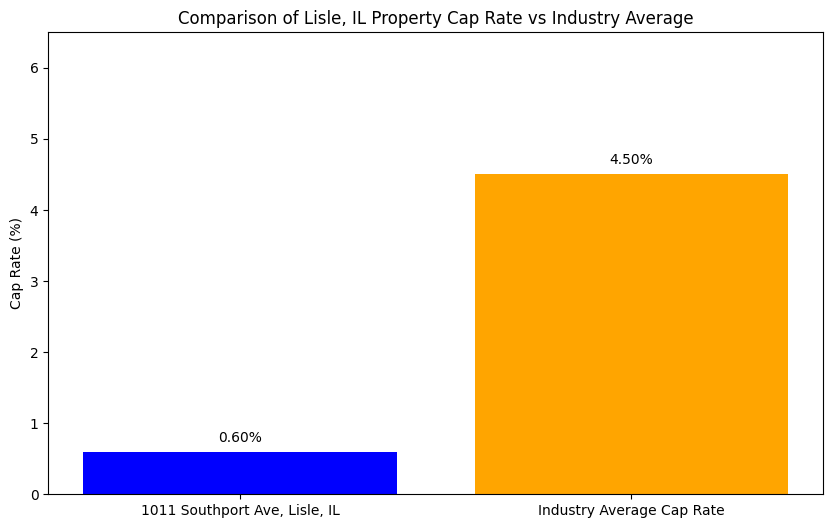

In [33]:
import matplotlib.pyplot as plt
# Create bar chart
plt.figure(figsize=(10, 6))
bars = ['1011 Southport Ave, Lisle, IL', 'Industry Average Cap Rate']
values = [cap_rate, industry_average_cap_rate]

plt.bar(bars, values, color=['blue', 'orange'])
plt.ylabel('Cap Rate (%)')
plt.title('Comparison of Lisle, IL Property Cap Rate vs Industry Average')

# Add values on top of the bars
for i, value in enumerate(values):
    plt.text(i, value + 0.1, f'{value:.2f}%', ha='center', va='bottom')

plt.ylim(0, max(values) + 2)  # Adjust y-axis limit for better visibility
plt.show()

### Calculate monthly and annual rental income and operating expenses 

In [34]:
monthly_effective_rental_income = gross_rental_income - vacancy_expense
annual_effective_rental_income = monthly_effective_rental_income * 12
annual_operating_expenses = total_operating_expenses * 12
print(f"Monthly Effective Rental Income: ${monthly_effective_rental_income:.2f}")
print(f"Annual Effective Rental Income (AERI): ${annual_effective_rental_income:.2f}")
print(f"Annual Operating Expenses: ${annual_operating_expenses:.2f}")

Monthly Effective Rental Income: $3627.96
Annual Effective Rental Income (AERI): $43535.52
Annual Operating Expenses: $16467.84


### Create functions to calculate mortgage payment and annual debt service

In [37]:
def calculate_monthly_mortgage_payment(loan_amount, annual_interest_rate, loan_term_years):
    # Convert annual interest rate to a monthly interest rate
    monthly_interest_rate = annual_interest_rate / 12 / 100

    # Calculate total number of payments
    total_payments = loan_term_years * 12

    # Calculate the monthly mortgage payment using the formula
    monthly_payment = loan_amount * (monthly_interest_rate * (1 + monthly_interest_rate) ** total_payments) / ((1 + monthly_interest_rate) ** total_payments - 1)

    return monthly_payment

def calculate_annual_debt_service(loan_amount, annual_interest_rate, loan_term_years):
    # Calculate monthly mortgage payment
    monthly_payment = calculate_monthly_mortgage_payment(loan_amount, annual_interest_rate, loan_term_years)

    # Calculate annual debt service (monthly payment times 12)
    annual_debt_service = monthly_payment * 12

    return annual_debt_service

### Define loan details

In [39]:
loan_amount = 300000  # loan amount in dollars
annual_interest_rate = 6.27  # annual interest rate in percent
loan_term_years = 30  # loan term in years

### Use functions to calculate monthly mortgage payment and annual debt service

In [40]:
monthly_payment = calculate_monthly_mortgage_payment(loan_amount, annual_interest_rate, loan_term_years)
annual_debt_service = calculate_annual_debt_service(loan_amount, annual_interest_rate, loan_term_years)

print(f"Monthly Mortgage Payment: ${monthly_payment:.2f}")
print(f"Annual Debt Service: ${annual_debt_service:.2f}")

Monthly Mortgage Payment: $1851.06
Annual Debt Service: $22212.67


### Calculate Debt Service Coverage Ratio (DSCR)

In [42]:
annual_noi = net_operating_income * 12
def calculate_dscr(annual_noi, annual_debt_service):
  dscr = annual_noi / annual_debt_service
  return dscr

dscr = calculate_dscr(annual_noi, annual_debt_service)

# Output results
print(f"Net Operating Income (Annual): ${annual_noi:.2f}")
print(f"Debt Service Coverage Ratio (DSCR): {dscr:.2f}")

Net Operating Income (Annual): $27956.16
Debt Service Coverage Ratio (DSCR): 1.26


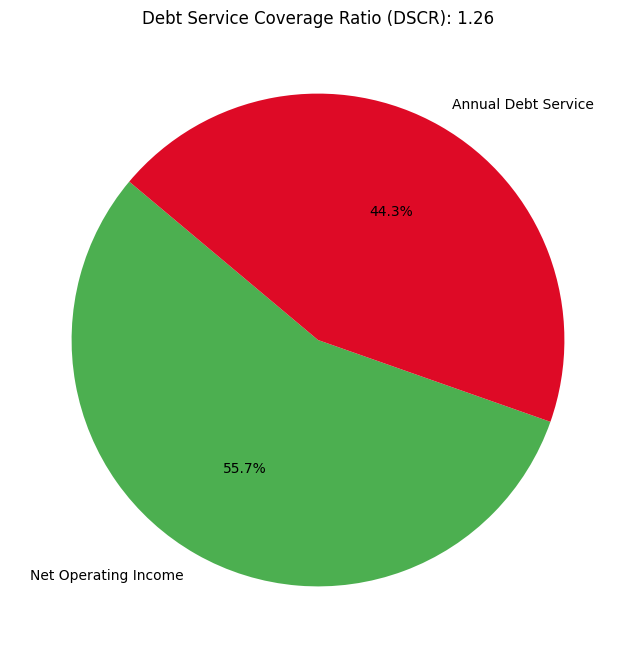

In [46]:
# Create data for the pie chart
labels = ['Net Operating Income', 'Annual Debt Service']
sizes = [annual_noi, annual_debt_service]
colors = ['#4CAF50', '#de0a26']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title(f'Debt Service Coverage Ratio (DSCR): {dscr:.2f}')
plt.show()

### Calculate IRR and NPV

In [52]:
import numpy_financial as npf

# Example cash flows: initial investment (negative) followed by annual returns (positive)
initial_investment = -389900
annual_rental_income = annual_effective_rental_income
cash_flows = [initial_investment] + [annual_rental_income] * 10  # Example for 10 years
discount_rate = 0.06  # Example discount rate of 8%

# Calculate NPV
npv = npf.npv(discount_rate, cash_flows)
print(f"NPV: ${npv:.2f}")
# Calculate IRR
irr = npf.irr(cash_flows)
print(f"IRR: {irr:.2%}")

NPV: $-69474.78
IRR: 2.06%


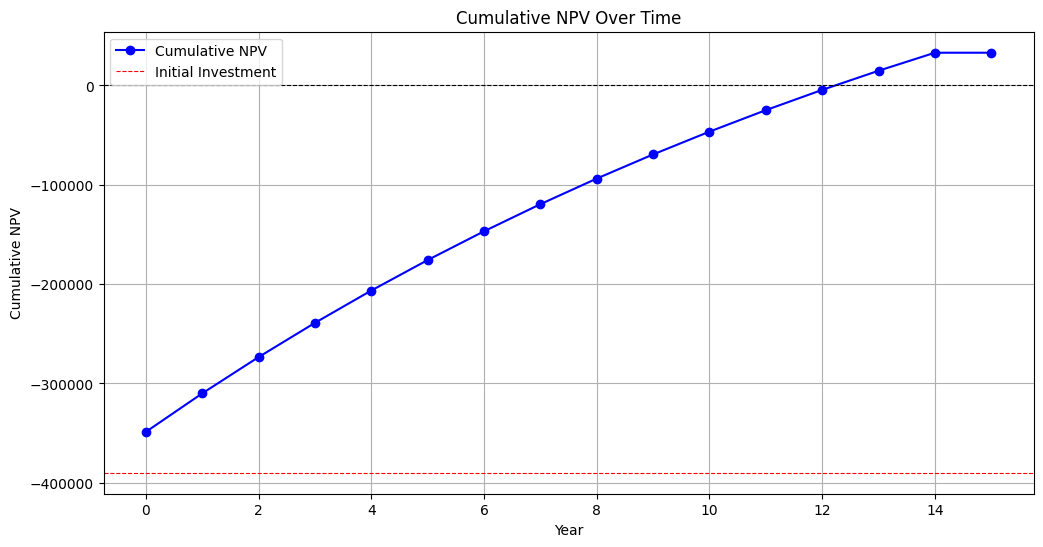

In [59]:
years = np.arange(0, 16)  # From year 0 to 15

# Create cash flows list for each year
cash_flows = [initial_investment] + [annual_rental_income] * 15

# Calculate cumulative NPV for each year
cumulative_npv = [npf.npv(discount_rate, cash_flows[:i+1]) for i in range(1, len(cash_flows) + 1)]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(years, cumulative_npv, marker='o', color='b', label='Cumulative NPV')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axhline(initial_investment, color='red', linestyle='--', linewidth=0.8, label='Initial Investment')

plt.title('Cumulative NPV Over Time')
plt.xlabel('Year')
plt.ylabel('Cumulative NPV')
plt.legend()
plt.grid(True)
plt.show()

### Calculate payback period

In [66]:
def calculate_payback_period(initial_capital, cash_flows):
    cumulative_cash_flow = 0
    for year, cash_flow in enumerate(cash_flows):
        cumulative_cash_flow += cash_flow
        if cumulative_cash_flow >= initial_capital:
            return year + (initial_capital - (cumulative_cash_flow - cash_flow)) / cash_flow
    return None  # Return None if the payback period is not within the provided cash flows

# Example cash flows: initial investment (negative) followed by annual returns (positive)
initial_capital = 389900
cash_flows = [annual_effective_rental_income] * 10  # Example annual cash flow for 10 years

payback_period = calculate_payback_period(initial_capital, cash_flows)
if payback_period:
    print(f"Payback Period: {payback_period:.2f} years")
else:
    print("Payback period not reached within the given cash flows.")

Payback Period: 8.96 years
